In [ ]:
SELECT count(*)
FROM nashville_housing

   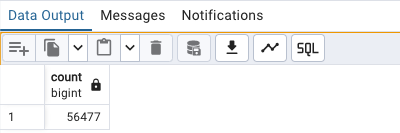 

In [ ]:
SELECT uniqueid,PropertyAddress

FROM Nashville_Housing

WHERE PropertyAddress is null

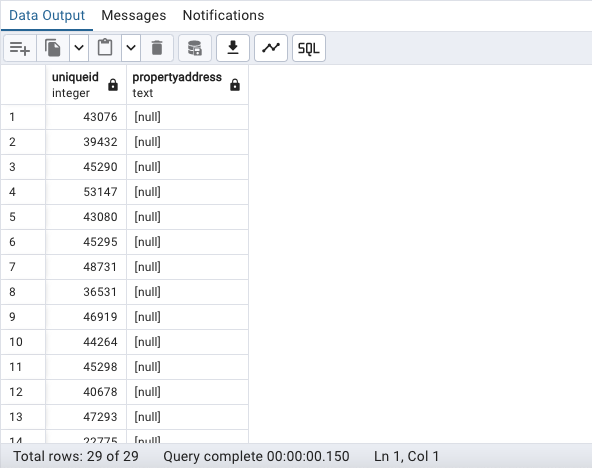

### I noticed there are nulls. Let's investigate.

In [ ]:
SELECT *
FROM Nashville_Housing
ORDER BY ParcelID

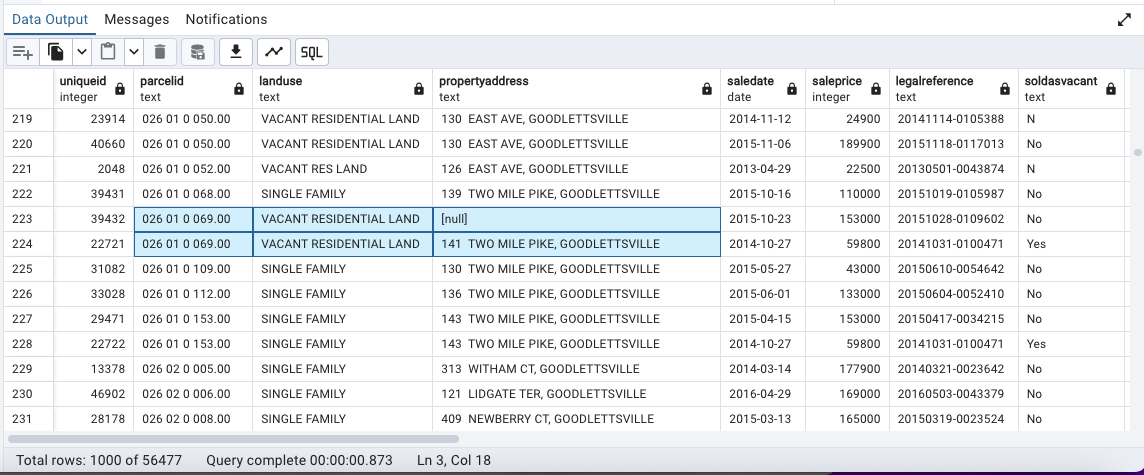

### I notice the same ParcelID and PropertyAddress are listed for different UniqueIDs and PropertyAddress is null.
Let's find a ParcelID with a null PropertyAddress. Then populate the PropertyAddress from a different UniqueID with a matching ParcelID

In [ ]:
SELECT a.ParcelID, a.PropertyAddress, b.ParcelID, b.PropertyAddress
FROM Nashville_Housing a
JOIN Nashville_Housing b
ON a.ParcelID = b.parcelID
AND a.UniqueID <> b.UniqueID
WHERE a.PropertyAddress is null

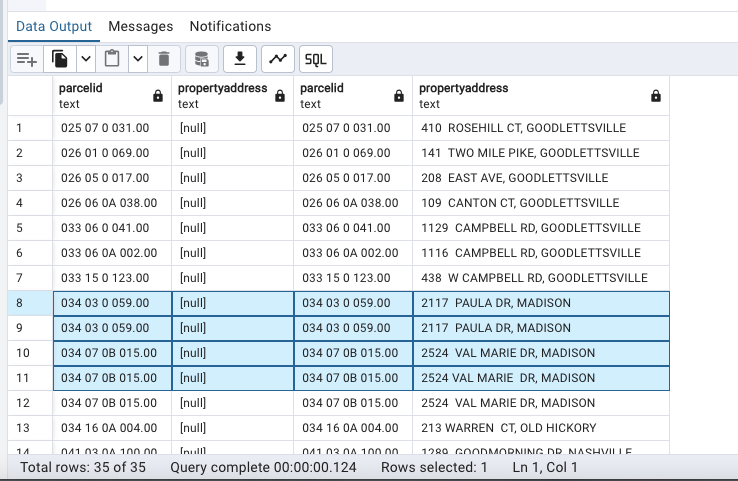

### Find where the ParcelIDs are the same and look where the PropertyAddress is null but the UniqueIDs are different

In [ ]:
SELECT a.ParcelID, a.PropertyAddress, b.ParcelID, b.PropertyAddress, COALESCE(a.PropertyAddress, b.PropertyAddress)
FROM nashville_housing a
JOIN nashville_housing b
ON a.ParcelID = b.parcelID
AND a.UniqueID <> b.UniqueID
WHERE a.PropertyAddress IS NULL;

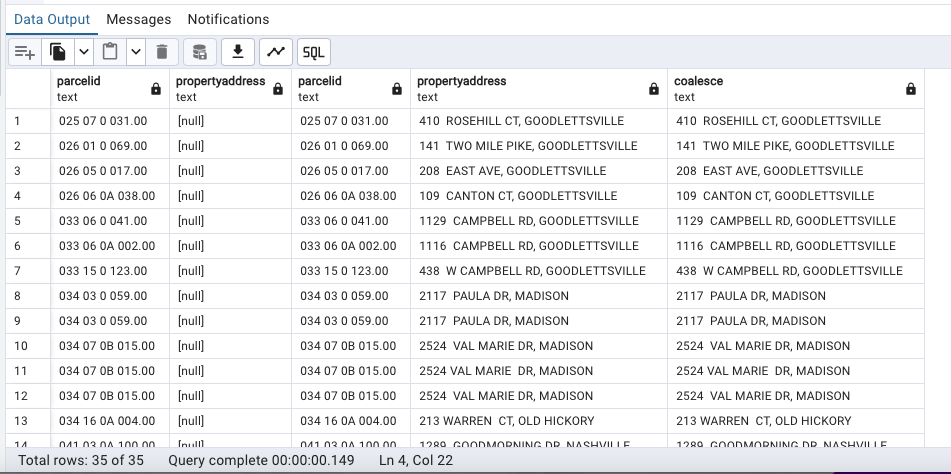

### Update PropertyAddress column

UPDATE nashville_housing
SET PropertyAddress = COALESCE(a.PropertyAddress, b.PropertyAddress)
FROM nashville_housing a
JOIN nashville_housing b
ON a.ParcelID = b.parcelID
AND a.UniqueID <> b.UniqueID
WHERE nashville_housing.PropertyAddress IS NULL;

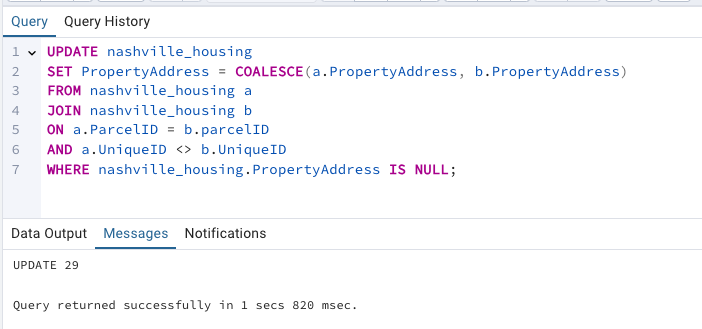

### rerun the previous query to check that there are no nulls.

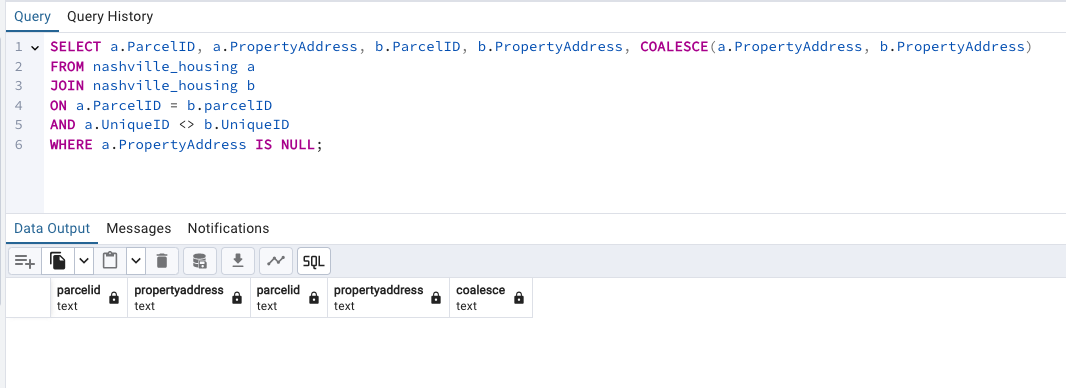

In [ ]:
Select PropertyAddress
FROM Nashville_Housing;

### Split PropertyAddress into separate columns for address and city 

In [ ]:
SELECT
    LEFT(PropertyAddress, POSITION(',' IN PropertyAddress) - 1) AS Address,
    RIGHT(PropertyAddress, LENGTH(PropertyAddress) - POSITION(',' IN PropertyAddress)) AS City
FROM nashville_housing;

### Split PropertyAddress column

In [ ]:
ALTER TABLE Nashville_Housing
ADD SplitPropertyAddress varchar(255);

In [ ]:
UPDATE nashville_housing
SET SplitPropertyAddress = LEFT(PropertyAddress, POSITION(',' IN PropertyAddress) - 1);

In [ ]:
ALTER TABLE Nashville_Housing
ADD SplitPropertyCity varchar(255);

In [ ]:
UPDATE nashville_housing
SET SplitPropertyCity = RIGHT(PropertyAddress, LENGTH(PropertyAddress) - POSITION(',' IN PropertyAddress));

In [ ]:
SELECT *
FROM Nashville_Housing;

### Let's look at the OwnerAddress

In [ ]:
SELECT OwnerAddress
FROM Nashville_Housing;

### Split OwnerAddress into separate columns for address, city, and state.

In [ ]:
SELECT
SPLIT_PART(REPLACE(OwnerAddress, ',', '.'), '.', 1) AS SplitOwnerAddress, 
SPLIT_PART(REPLACE(OwnerAddress, ',', '.'), '.', 2) AS SplitOwnerCity,
SPLIT_PART(REPLACE(OwnerAddress, ',', '.'), '.', 3) AS SplitOwnerState
FROM Nashville_Housing;

In [ ]:
ALTER TABLE Nashville_Housing
ADD SplitOwnerAddress VARCHAR(255);

In [ ]:
Update Nashville_Housing
SET SplitOwnerAddress = SPLIT_PART(REPLACE(OwnerAddress, ',', '.'), '.', 1);

In [ ]:
ALTER TABLE Nashville_Housing
ADD SplitOwnerCity VARCHAR(255);

In [ ]:
Update Nashville_Housing
SET SplitOwnerCity = SPLIT_PART(REPLACE(OwnerAddress, ',', '.'), '.', 2);

In [ ]:
ALTER TABLE Nashville_Housing
ADD SplitOwnerState VARCHAR(255);

In [ ]:
Update Nashville_Housing
SET SplitOwnerState = SPLIT_PART(REPLACE(OwnerAddress, ',', '.'), '.', 3);

In [ ]:
SELECT *
FROM Nashville_Housing;

### Let's look at the SoldAsVacant column.

In [ ]:
SELECT DISTINCT(SoldAsVacant), COUNT (SoldAsVacant)
FROM Nashville_Housing
GROUP BY SoldAsVacant
ORDER BY 2;

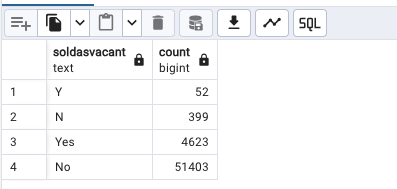

SELECT SoldAsVacant, CASE
WHEN SoldAsVacant = 'Y' THEN 'Yes' 
WHEN SoldAsVacant = 'N' THEN 'No'
ELSE SoldAsVacant
END
FROM Nashville_Housing;

In [ ]:
UPDATE Nashville_Housing
SET SoldAsVacant = CASE
WHEN SoldAsVacant = 'Y' THEN 'Yes' 
WHEN SoldAsVacant = 'N' THEN 'No'
ELSE SoldAsVacant
END;

In [ ]:
SELECT DISTINCT(SoldAsVacant), COUNT (SoldAsVacant)
FROM Nashville_Housing
GROUP BY SoldAsVacant
ORDER BY 2;

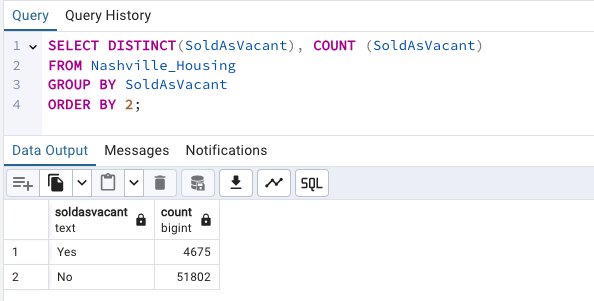

### Check for duplicates. 

In [ ]:
SELECT *,
ROW_NUMBER() OVER (
PARTITION BY ParcelID,
			PropertyAddress,
			SalePrice,
			SaleDate,
			LegalReference
			ORDER BY UniqueID
			) AS row_num
FROM Nashville_Housing
ORDER BY ParcelID;

### Using a Common Table Expression (CTE), identify and remove these duplicate entries from the dataset

In [ ]:
WITH RowNumCTE AS (
SELECT *,ROW_NUMBER() 
OVER (
PARTITION BY ParcelID, PropertyAddress, SalePrice, SaleDate, LegalReference ORDER BY UniqueID) AS row_num
FROM Nashville_Housing 
ORDER BY ParcelID)
SELECT *
FROM RowNumCTE
WHERE row_num > 1
ORDER BY PropertyAddress;

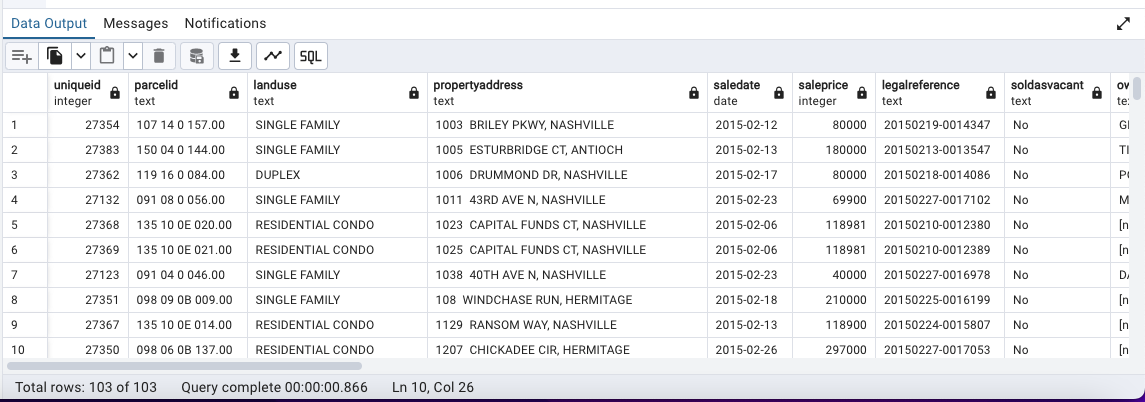

### Remove the duplicates

In [ ]:
WITH RowNumCTE AS (
  SELECT *,
         ROW_NUMBER() OVER (
           PARTITION BY ParcelID, PropertyAddress, SalePrice, SaleDate, LegalReference
           ORDER BY UniqueID
         ) AS row_num
  FROM Nashville_Housing
  ORDER BY ParcelID
) 
DELETE FROM Nashville_Housing a
USING RowNumCTE
WHERE a.uniqueid = RowNumCTE.uniqueid
AND row_num > 1;

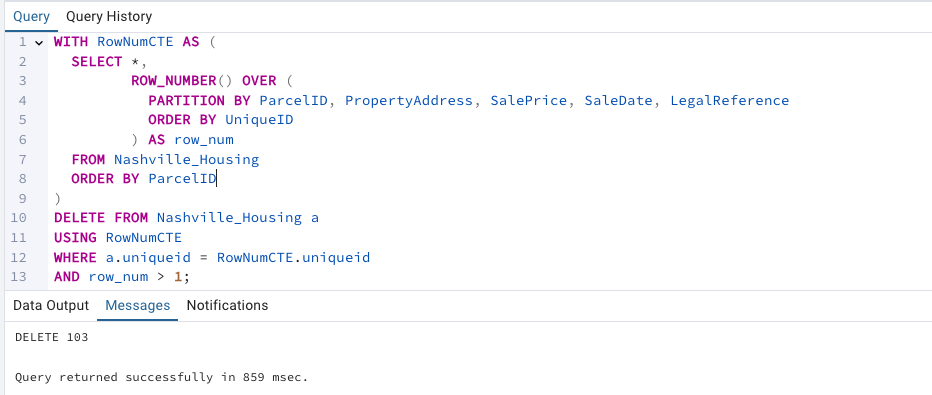

### Remove columns that we had split earlier and do not need

In [ ]:
ALTER TABLE Nashville_Housing 
DROP COLUMN OwnerAddress;

In [ ]:
ALTER TABLE Nashville_Housing 
DROP COLUMN PropertyAddress;